In [70]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# Link to the Kickstarter Projects dataset on Kaggle:
# https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv

df = pd.read_csv('ks-projects-201801.csv')

df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [72]:
# Rename columns and drop unneeded ones

df['usd_pledged'] = df.usd_pledged_real
df['usd_goal'] = df.usd_goal_real

df_ks = df.drop(columns=['goal', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'])

In [74]:
# Get the top 50 Kickstarter campaigns by $ pledged
df_sorted = df_ks.sort_values(by='usd_pledged', ascending=False)

df_top = df_sorted.head(500)

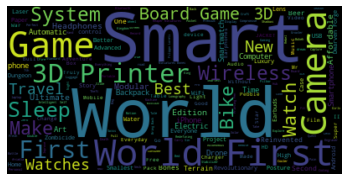

In [41]:
# Join all names and separate them by whitespace
text = " ".join(str(name) for name in df_top.name)

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

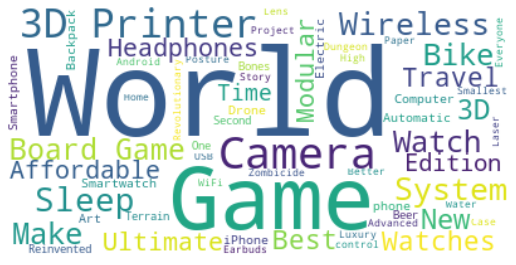

In [69]:
# Create stopword list:
stopwords = set(STOPWORDS)
# This time, add in your own words to ignore
stopwords.update(["First", "Smart"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", min_font_size=8).generate(text)

# Display the generated image:
# But make it a little larger this time..
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()